In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
holiday_df=pd.read_csv(r'C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\holidays_events.csv',encoding='utf-8')
holiday_df.head()
Oil_df=pd.read_csv(r'C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\oil.csv')
Oil_df.head()
Transactional_df=pd.read_csv(r"C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\transactions.csv")
Transactional_df.head()
Store_df=pd.read_csv(r"C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\stores.csv")
Store_df.head()
Train_df=pd.read_csv(r"C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\train.csv")
Train_df.head()
Test_df=pd.read_csv(r"C:\Users\abhis\OneDrive\Documents\storte_python\store-sales-time-series-forecasting\test.csv")
Test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [4]:
merge1=pd.merge(Train_df,Oil_df, on='date',how='left')
merge2=pd.merge(merge1,Transactional_df,on=['date','store_nbr'],how='left')
merge3=pd.merge(merge2,Store_df,on='store_nbr',how='left')
merge3

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6


In [5]:
holiday_df['date']=pd.to_datetime(holiday_df['date'],format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
# drop holidays that were transferred and those that aren't national holidays
holiday_df=holiday_df[holiday_df['transferred']!=True]
holiday_df[holiday_df['locale']=='National']
holiday_df = holiday_df.drop(columns=['type', 'locale', 'locale_name', 'transferred'])


In [7]:
holiday_df.head()

,date,description
0,2012-03-02,Fundacion de Manta
1,2012-04-01,Provincializacion de Cotopaxi
2,2012-04-12,Fundacion de Cuenca
3,2012-04-14,Cantonizacion de Libertad
4,2012-04-21,Cantonizacion de Riobamba


In [8]:
merge4 = pd.merge(merge3, holiday_df, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

df = merge4
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano


In [99]:
df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   dcoilwtico    float64
 7   transactions  float64
 8   city          object 
 9   state         object 
 10  type          object 
 11  cluster       int64  
 12  holiday       object 
dtypes: float64(3), int64(4), object(6)
memory usage: 302.9+ MB


,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,3054348.00,3054348.00,3054348.00,3054348.00,2099196.00,2805231.00,3054348.00
mean,1504276.78,27.50,359.02,2.62,68.02,1697.07,8.48
std,866261.01,15.59,1107.29,12.25,25.69,966.83,4.65
min,0.00,1.00,0.00,0.00,26.19,5.00,1.00
25%,754676.75,14.00,0.00,0.00,46.41,1046.00,4.00
50%,1507571.50,27.50,11.00,0.00,53.43,1395.00,8.50
75%,2255120.25,41.00,196.01,0.00,95.81,2081.00,13.00
max,3000887.00,54.00,124717.00,741.00,110.62,8359.00,17.00


In [9]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type                  0
cluster               0
holiday         2567862
dtype: int64

In [10]:
def oil_info(x):
    if x.notnull().sum()>1:
        return x.interpolate().ffill().bfill()
    else:
        return x.ffill().bfill()
df['dcoilwtico']=oil_info(df['dcoilwtico'])
df.isnull().sum()    

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
transactions     249117
city                  0
state                 0
type                  0
cluster               0
holiday         2567862
dtype: int64

In [11]:
def date_feature(x):
    x['date']=pd.to_datetime(x['date'])
    x['year']=x['date'].dt.year
    x['month']=x['date'].dt.month
    x['quater']=x['date'].dt.quarter
    x['day']=x['date'].dt.day
    x['day_name']=x['date'].dt.day_name()
    return x

df=date_feature(df)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday


In [12]:
df1=df.sample(n=300000).reset_index()

<Axes: xlabel='date', ylabel='sales'>

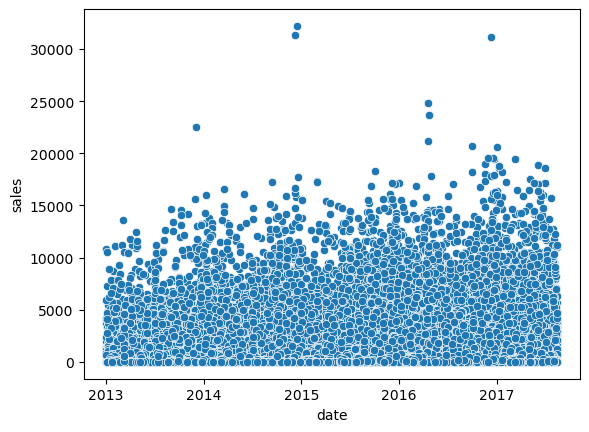

In [13]:
sns.scatterplot(data=df1,x='date',y='sales')

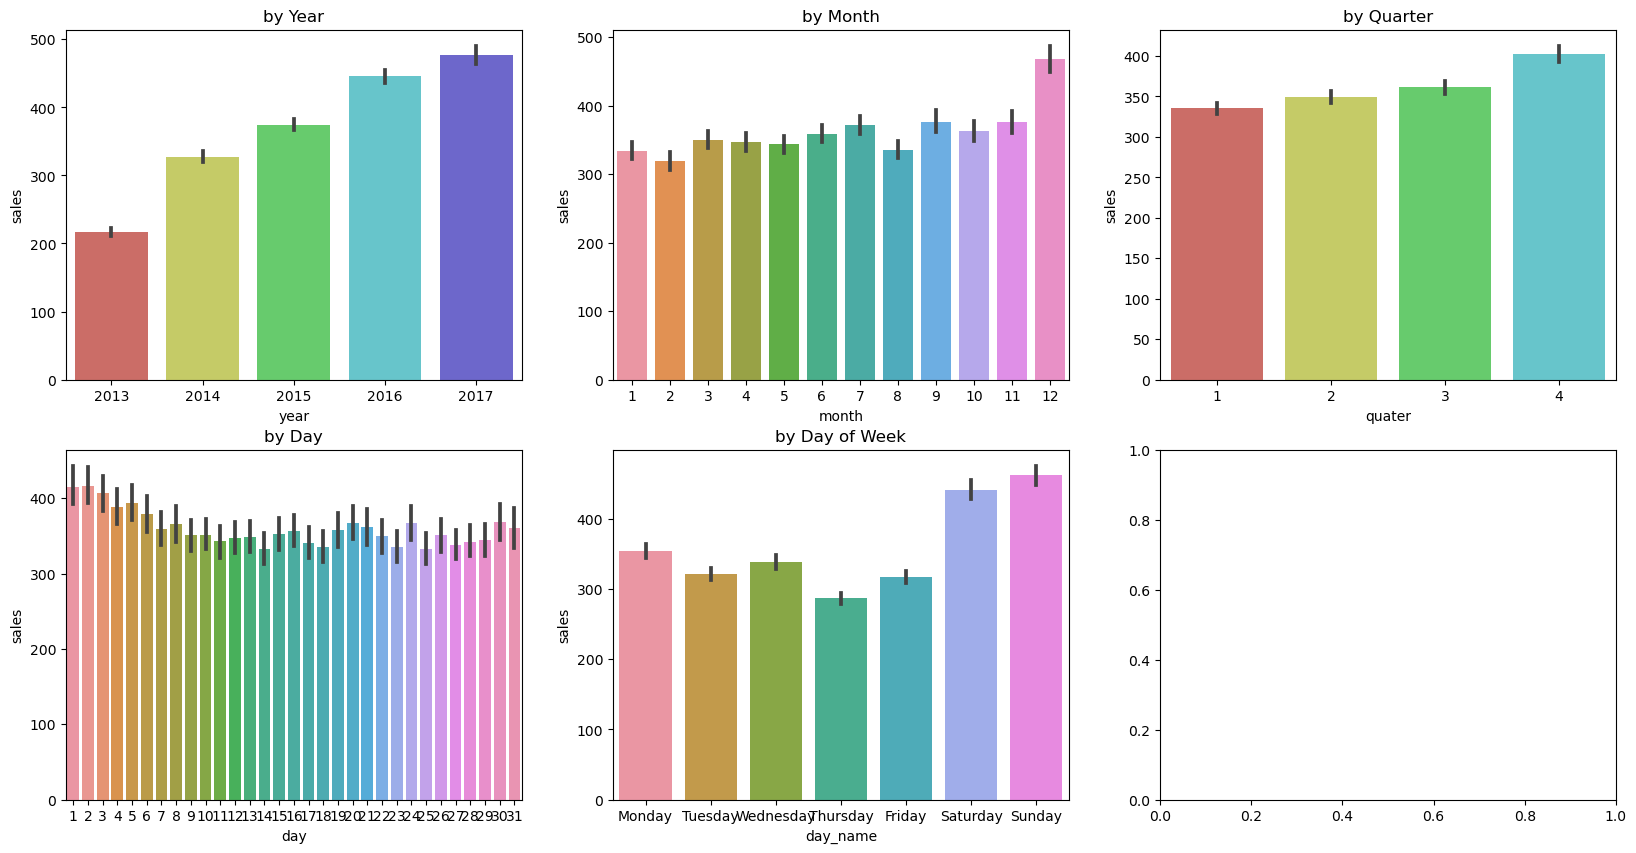

In [15]:
# viewing sales data

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette('hls')
fig, axs = plt.subplots(2, 3, figsize=(20,10))

sns.barplot(x='year', y='sales', data=df1, ax=axs[0,0])
sns.barplot(x='month', y='sales', data=df1, ax=axs[0,1])
sns.barplot(x='day', y='sales', data=df1, ax=axs[1,0])
sns.barplot(x='day_name', y='sales', data=df1, ax=axs[1,1], order=order)
sns.barplot(x='quater',y='sales',data=df1,ax=axs[0 ,2])

axs[0,0].set_title('by Year')
axs[0,1].set_title('by Month')
axs[1,0].set_title('by Day')
axs[1,1].set_title('by Day of Week')
axs[0,2].set_title('by Quarter')
plt.show()

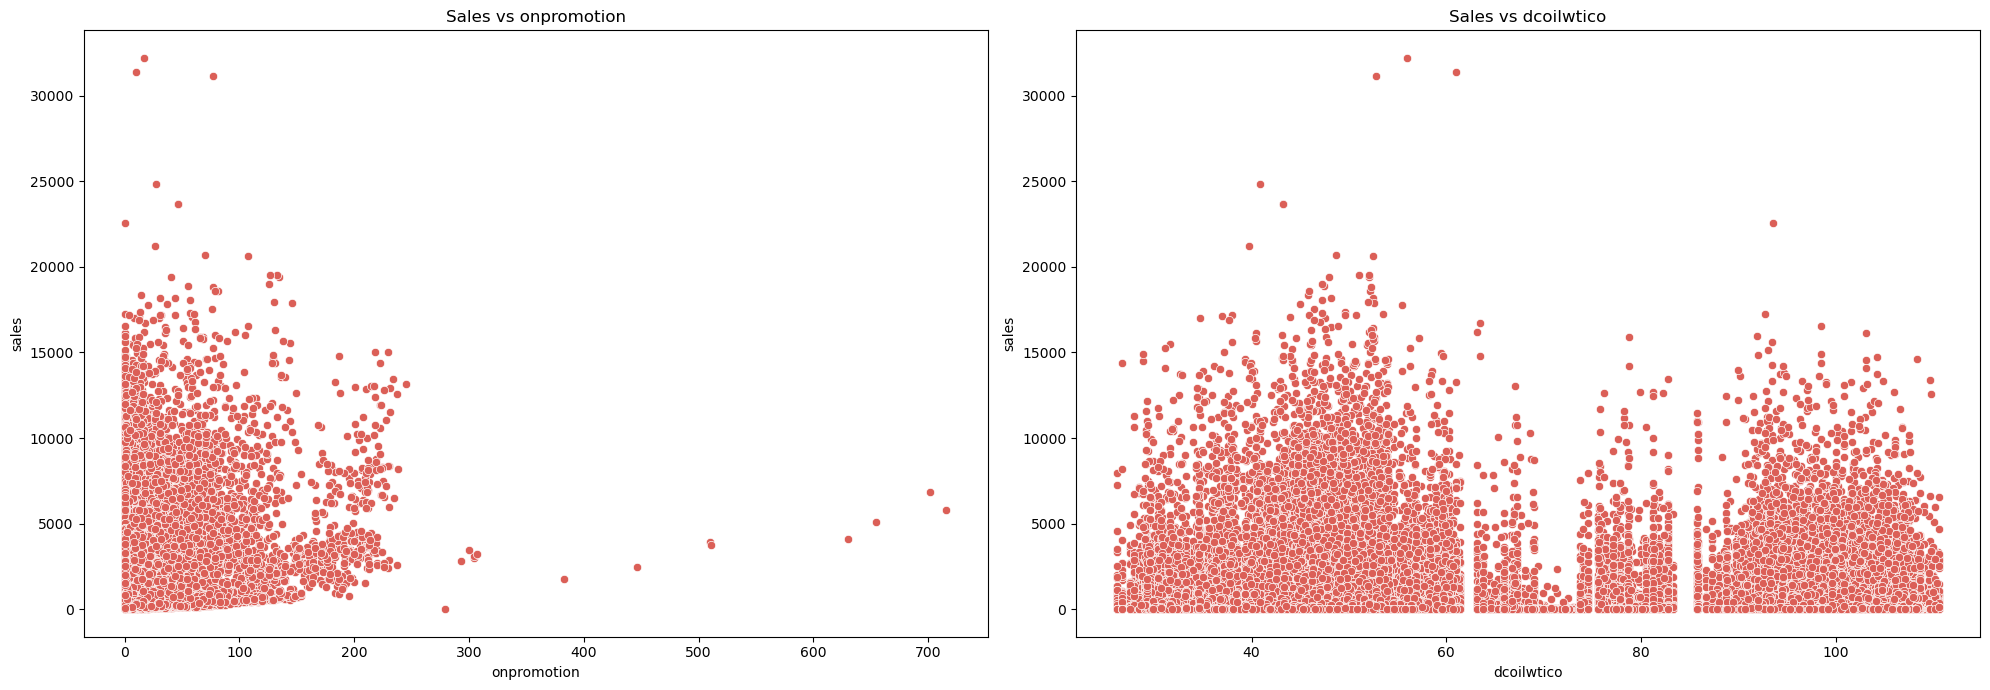

In [16]:
fig,axs=plt.subplots(1,2,figsize=(20,7))
sns.scatterplot(data=df1,x='onpromotion',y='sales',ax=axs[0])
sns.scatterplot(data=df1,x='dcoilwtico',y='sales',ax=axs[1])
axs[0].set_title('Sales vs onpromotion')
axs[1].set_title('Sales vs dcoilwtico')
plt.tight_layout()
plt.show()


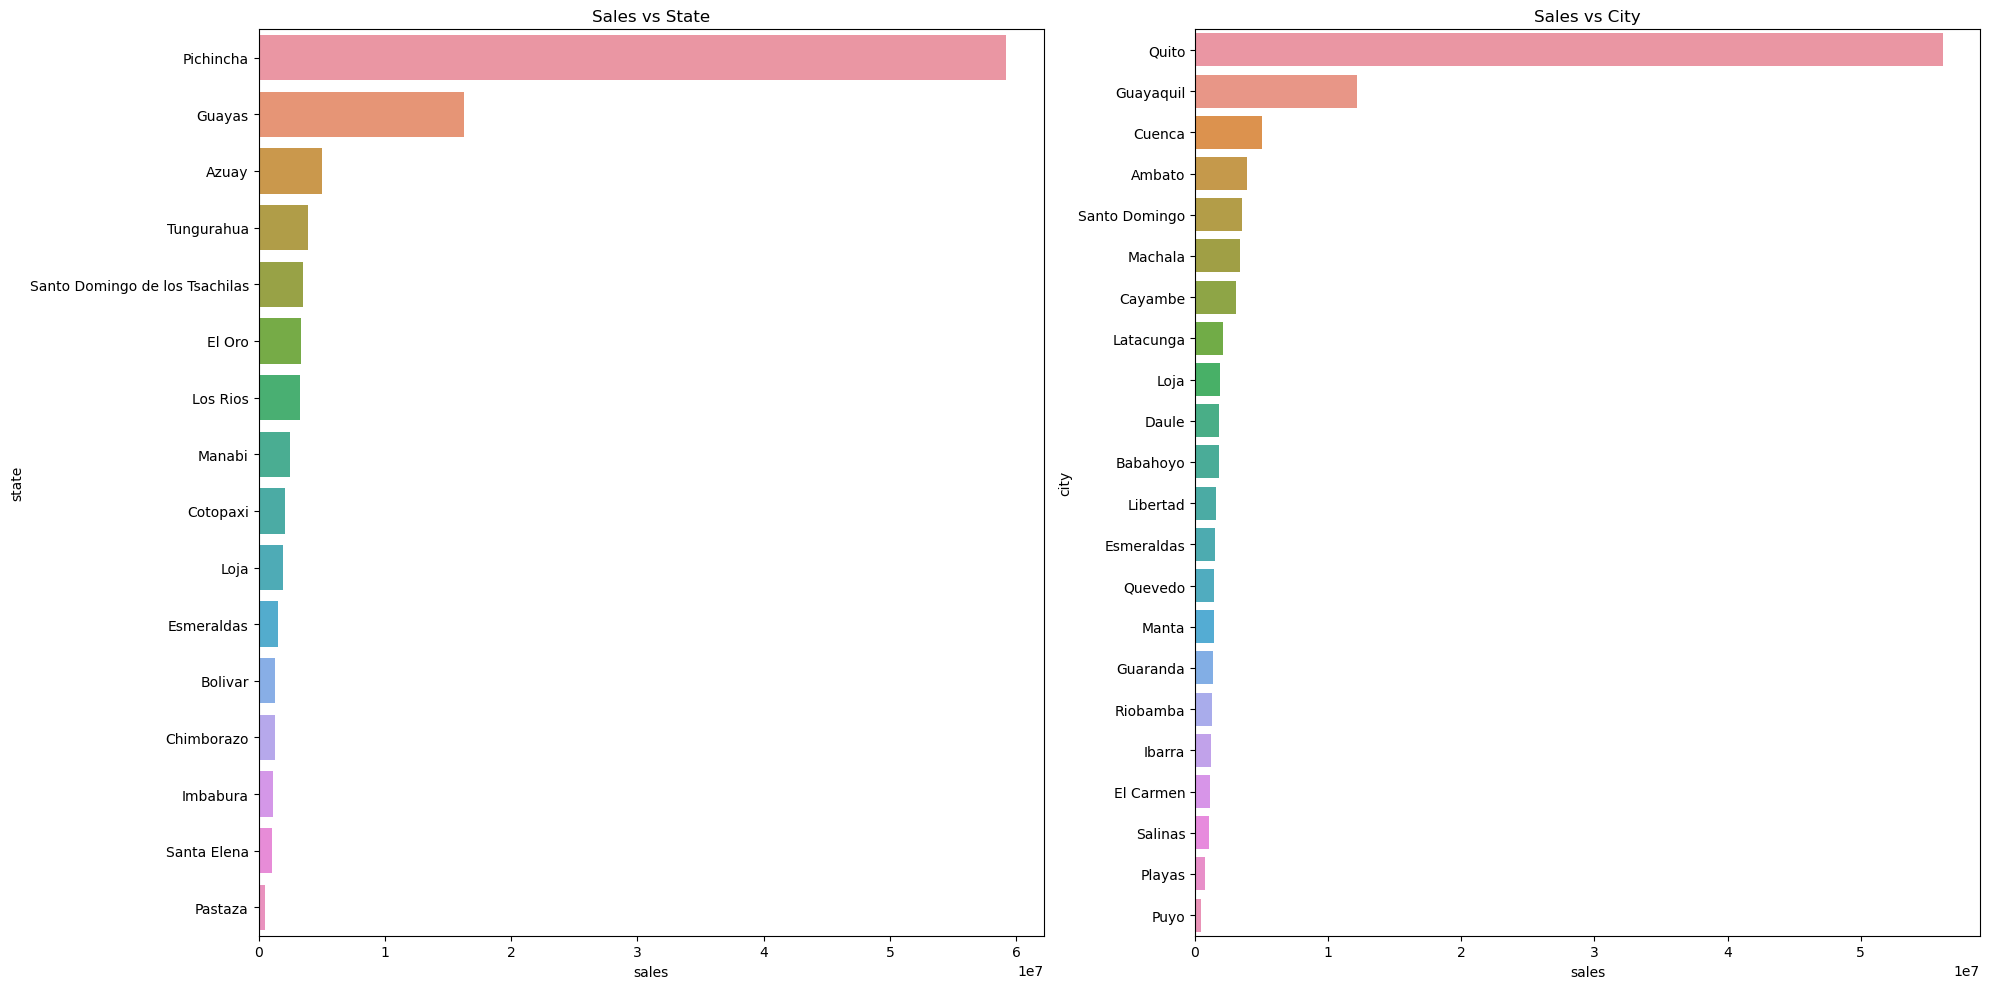

In [107]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
sns.barplot(y='state',x='sales',data=df1.groupby('state')['sales'].sum().reset_index().sort_values('sales',ascending=False),ax=axs[0])
sns.barplot(y='city',x='sales',data=df1.groupby('city')['sales'].sum().reset_index().sort_values('sales',ascending=False),ax=axs[1])
axs[0].set_title('Sales vs State')
axs[1].set_title('Sales vs City')
plt.tight_layout()
plt.show()


In [18]:
np.sort(df1['family'].unique())

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [19]:
family_pivot=df1.groupby('family')['sales'].sum().reset_index().sort_values('sales',ascending=False)
total_Sales=df1['sales'].sum()
family_pivot['Sales_Percentage']=(family_pivot['sales']/total_Sales)*100
family_pivot.head()

,family,sales,Sales_Percentage
12,GROCERY I,3.454793e+07,31.986615
3,BEVERAGES,2.237379e+07,20.715045
30,PRODUCE,1.221337e+07,11.307892
7,CLEANING,9.611640e+06,8.899052
8,DAIRY,6.527804e+06,6.043846


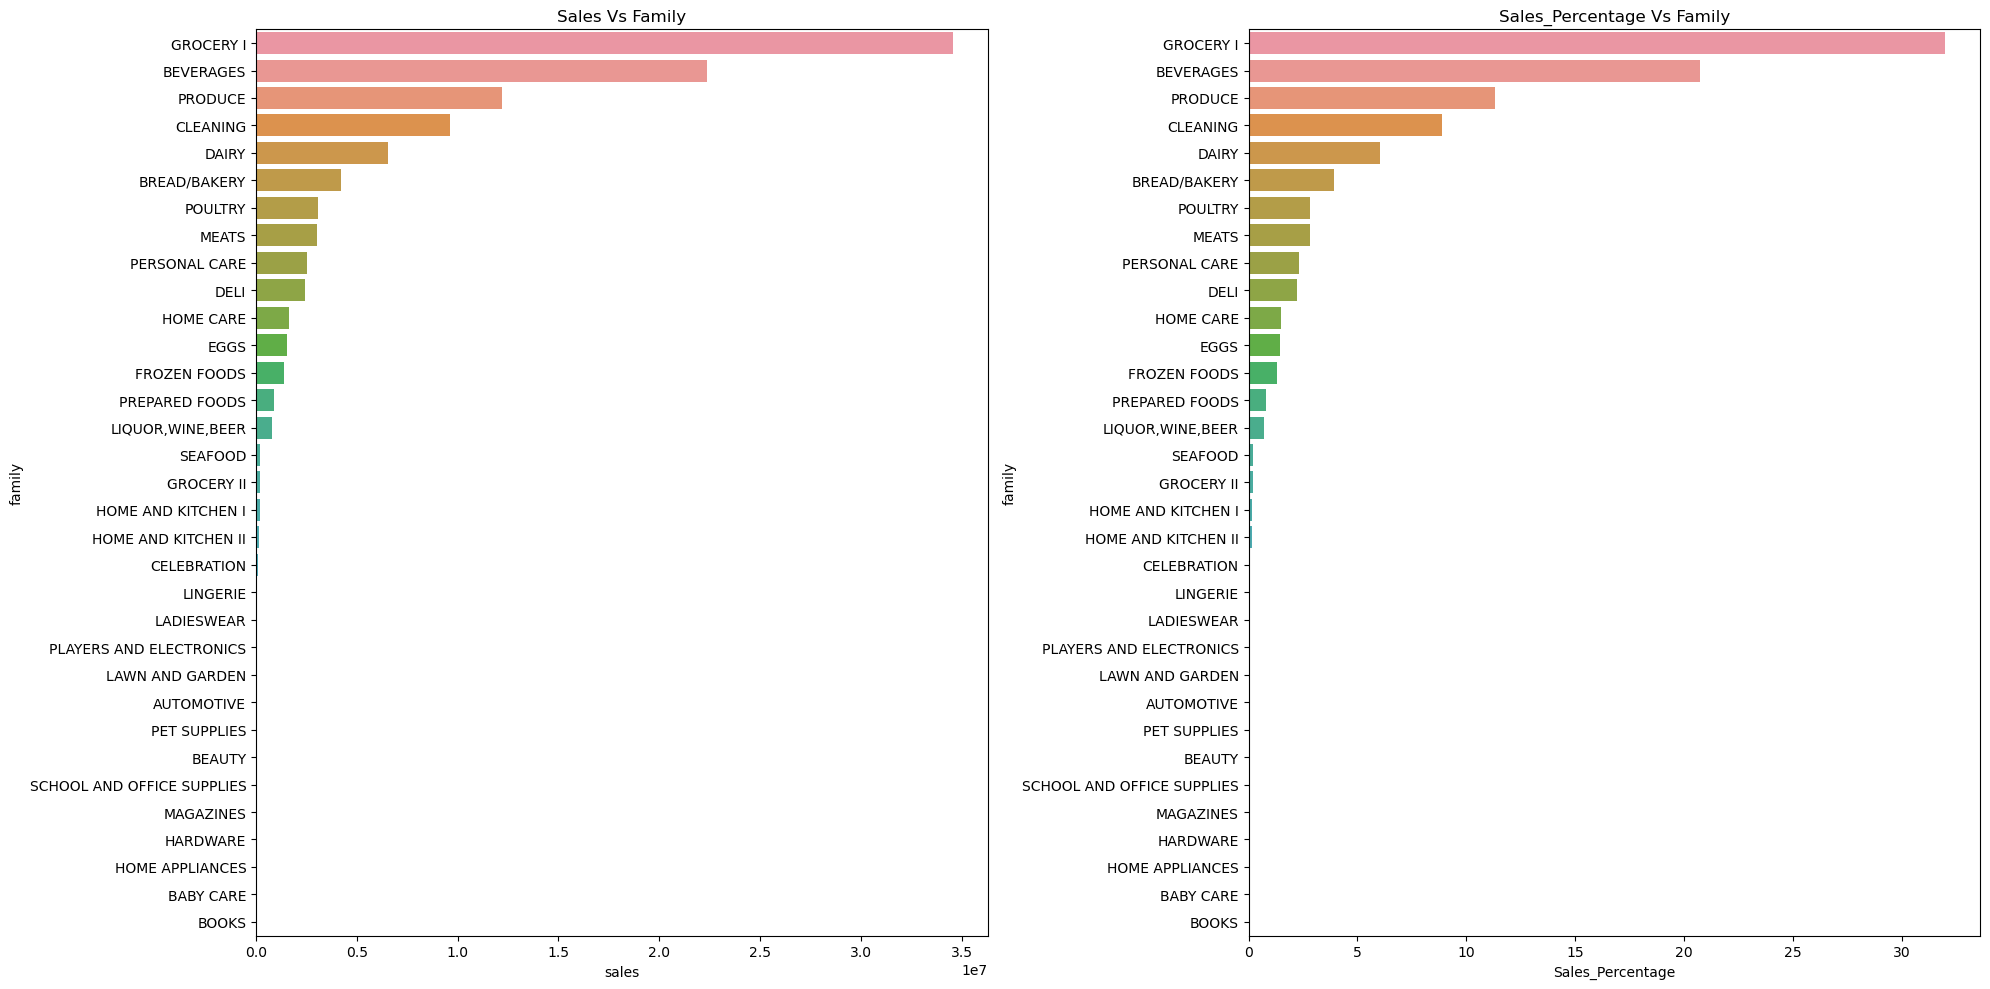

In [20]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='sales',y='family',data=family_pivot,ax=axs[0])
sns.barplot(x='Sales_Percentage',y='family',data=family_pivot,ax=axs[1])
axs[0].set_title('Sales Vs Family')
axs[1].set_title('Sales_Percentage Vs Family')
plt.tight_layout()
plt.show()

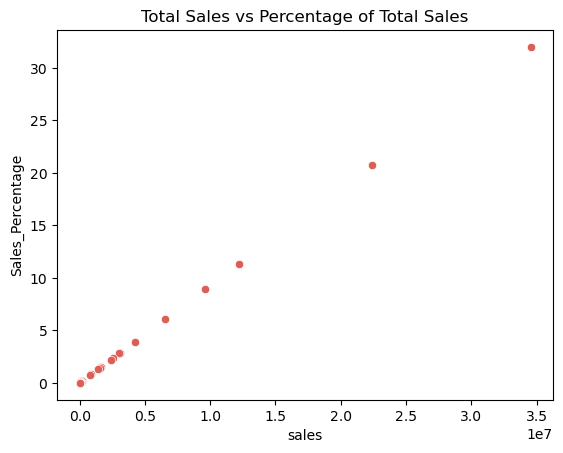

In [21]:
ax = sns.scatterplot(data=family_pivot, x='sales', y='Sales_Percentage')
ax.set_title('Total Sales vs Percentage of Total Sales')

plt.show()

In [22]:
family_map       = {'AUTOMOTIVE': 'first',
                   'BABY CARE': 'first',
                   'BEAUTY': 'rest',
                   'BOOKS': 'rest',
                   'CELEBRATION': 'rest',
                   'GROCERY II': 'rest',
                   'HARDWARE': 'rest',
                   'HOME AND KITCHEN I': 'rest',
                   'HOME AND KITCHEN II': 'rest',
                   'HOME APPLIANCES': 'rest',
                   'LADIESWEAR': 'rest',
                   'LAWN AND GARDEN': 'rest',
                   'LINGERIE': 'rest',
                   'MAGAZINES': 'rest',
                   'PET SUPPLIES': 'rest',
                   'PLAYERS AND ELECTRONICS': 'rest',
                   'SCHOOL AND OFFICE SUPPLIES': 'rest',
                   'SEAFOOD': 'rest',
                   'DELI': 'fifth',
                    'EGGS': 'sixth',
                    'FROZEN FOODS': 'sixth',
                    'HOME CARE': 'sixth',
                    'LIQUOR,WINE,BEER': 'sixth',
                    'PREPARED FOODS': 'sixth',
                    'PERSONAL CARE': 'fifth',
                    'BREAD/BAKERY': 'fourth',
                    'MEATS': 'fifth',
                    'POULTRY': 'third',
                    'CLEANING':'third',
                    'DAIRY':'fourth',
                    'PRODUCE':'third',
                    'BEVERAGES':'second',
                    'GROCERY I': 'first'
                   }

df['new_family'] = df['family'].map(family_map)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,first
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,first
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,rest
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,second
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,rest


In [23]:
df2 = df.drop(columns=['family'])
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,first
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,first
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,1,Tuesday,rest


In [24]:
def replace_non_null(x):
    x.loc[x['holiday'].notnull(), 'holiday'] = 'yes'
    return x

df2 = replace_non_null(df2)

In [25]:
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,1,Tuesday,first
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,1,Tuesday,first
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,1,Tuesday,rest


In [26]:
from sklearn.model_selection import train_test_split
x,y=df2.drop('sales',axis=1),df2['sales']



In [27]:
cats=x.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
    x[col]=x[col].astype('category')
x.dtypes

id                 int64
date            category
store_nbr          int64
onpromotion        int64
dcoilwtico       float64
transactions     float64
city            category
state           category
type            category
cluster            int64
holiday         category
year               int32
month              int32
quater             int32
day                int32
day_name        category
new_family      category
dtype: object

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [29]:
import xgboost as xgb

dtrain_reg=xgb.DMatrix(x_train,y_train,enable_categorical=True)
dtest_reg=xgb.DMatrix(x_test,y_test,enable_categorical=True)


In [30]:
from sklearn.metrics import mean_squared_error
params={"objective":"reg:squarederror"}
evals=[(dtrain_reg,"train"),(dtest_reg,"validation")]
n=5000
model=xgb.train(
params=params,
dtrain=dtrain_reg,
num_boost_round=n,
evals=evals,
verbose_eval=250,
early_stopping_rounds=50)
preds=model.predict(dtest_reg)
rmse=mean_squared_error(y_test,preds,squared=False)
print(f"RMSE:{rmse:.3f}")


[0]	train-rmse:889.26198	validation-rmse:877.28091
[142]	train-rmse:422.40345	validation-rmse:500.03042
RMSE:500.030


In [34]:
Test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [35]:
merge1=pd.merge(Test_df,Oil_df, on='date',how='left')
merge2=pd.merge(merge1,Transactional_df,on=['date','store_nbr'],how='left')
merge3=pd.merge(merge2,Store_df,on='store_nbr',how='left')
merge4 = pd.merge(merge3, holiday_df, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

testdf = merge4
testdf

,id,date,store_nbr,family,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80,NaN,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.80,NaN,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.80,NaN,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.80,NaN,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.80,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26,NaN,Quito,Pichincha,B,6,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26,NaN,Quito,Pichincha,B,6,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,47.26,NaN,Quito,Pichincha,B,6,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,NaN,Quito,Pichincha,B,6,NaN


In [37]:
testdf['dcoilwtico']=oil_info(testdf['dcoilwtico'])
testdf=date_feature(testdf)
testdf['new_family'] = testdf['family'].map(family_map)
testdf = testdf.drop(columns=['family'])

# replace holidays with yes or null

testdf = replace_non_null(testdf)

testdf.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,first
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,first
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,rest


In [38]:
testdf.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,quater,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,first
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,first
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,3,16,Wednesday,rest


In [39]:
cats=testdf.select_dtypes(exclude=np.number).columns.tolist()
print(cats)
for col in cats:
    testdf[col]=testdf[col].astype('category')

['date', 'city', 'state', 'type', 'holiday', 'day_name', 'new_family']


In [40]:
testdf_matrix=xgb.DMatrix(testdf,enable_categorical=True)
predictions=model.predict(testdf_matrix)
predictions
testdf['sales']=predictions


In [41]:
testdf['sales']=testdf['sales'].clip(lower=0)
testdf['sales']

0           0.000000
1           0.000000
2           0.000000
3        5044.033691
4           0.000000
            ...     
28507     775.010193
28508       0.000000
28509     775.010193
28510      76.991478
28511       0.000000
Name: sales, Length: 28512, dtype: float32

In [42]:
testdf = testdf.drop(columns=['date', 'store_nbr', 'onpromotion', 'dcoilwtico', 'transactions',
       'city', 'state', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'day_name', 'new_family'])

testdf.head()

,id,quater,sales
0,3000888,3,0.000000
1,3000889,3,0.000000
2,3000890,3,0.000000
3,3000891,3,5044.033691
4,3000892,3,0.000000


In [43]:
testdf = testdf.drop(columns=['quater'])
testdf.head()

,id,sales
0,3000888,0.000000
1,3000889,0.000000
2,3000890,0.000000
3,3000891,5044.033691
4,3000892,0.000000


In [44]:
testdf.to_csv('output_submissison_2.csv')